In [1]:
import pandas as pd

In [3]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns 

In [9]:
from sklearn import model_selection

In [11]:
from sklearn.linear_model import LogisticRegression

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
df = pd.read_csv('Stars.csv')
df.head(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3042,0.0005,0.1542,16.6,0.0,Red,M
2,2600,0.0003,0.102,18.7,0.0,Red,M
3,2800,0.0002,,16.65,0.0,Red,M
4,1939,0.000138,0.103,20.06,0.0,Red,M


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         239 non-null    object 
 1   Luminosity(L/Lo)        239 non-null    object 
 2   Radius(R/Ro)            239 non-null    object 
 3   Absolute magnitude(Mv)  239 non-null    object 
 4   Star type               239 non-null    float64
 5   Star color              239 non-null    object 
 6   Spectral Class          239 non-null    object 
dtypes: float64(1), object(6)
memory usage: 13.3+ KB


In [19]:
df.shape

(240, 7)

In [21]:
df.describe()

,Star type
count,239.00000
mean,2.51046
std,1.70728
min,0.00000
25%,1.00000
50%,3.00000
75%,4.00000
max,5.00000


In [29]:
from sklearn.feature_selection import SelectKBest

In [31]:
from sklearn.feature_selection import chi2

In [45]:
df['Star color'] = df['Star color'].astype('category').cat.codes 

In [47]:
df['Spectral Class'] = df['Spectral Class'].astype('category').cat.codes

In [49]:
X = df.drop('Star type', axis=1) 
y = df['Star type']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
from sklearn.ensemble import RandomForestClassifier 

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [83]:
print(df.dtypes)

Temperature (K)            object
Luminosity(L/Lo)           object
Radius(R/Ro)               object
Absolute magnitude(Mv)     object
Star type                 float64
Star color                   int8
Spectral Class               int8
dtype: object


In [95]:
df['Temperature (K)'] = pd.to_numeric(df['Temperature (K)'], errors='coerce')
df['Luminosity(L/Lo)'] = pd.to_numeric(df['Luminosity(L/Lo)'], errors='coerce')
df['Radius(R/Ro)'] = pd.to_numeric(df['Radius(R/Ro)'], errors='coerce')
df['Absolute magnitude(Mv)'] = pd.to_numeric(df['Absolute magnitude(Mv)'], errors='coerce')

In [97]:
df = df.dropna()

In [99]:
X = df.drop('Star type', axis=1)
y = df['Star type']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [103]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [105]:
y_pred = model.predict(X_test)

In [107]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  0  0 15  0  0]
 [ 0  0  0  0  7  0]
 [ 0  0  0  0  0 11]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      1.00      1.00        12
         2.0       1.00      1.00      1.00        13
         3.0       1.00      1.00      1.00        15
         4.0       1.00      1.00      1.00         7
         5.0       1.00      1.00      1.00        11

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



In [26]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

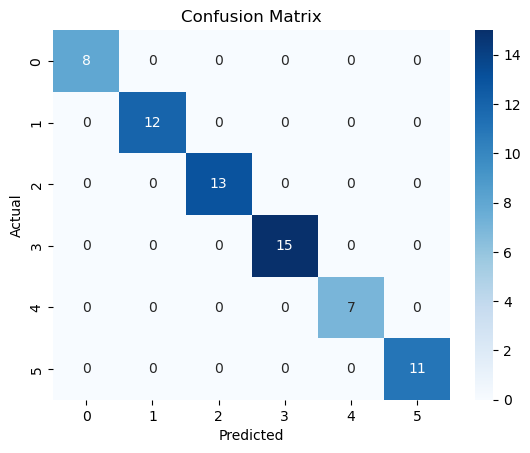

In [109]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()